In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('digikala-orders.csv')
data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [5]:
data['DateTime_CartFinalize'] = pd.to_datetime(data['DateTime_CartFinalize'])
data['InvoiceYearMonth'] = data['DateTime_CartFinalize'].map(lambda date: 100*date.year + date.month)
data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,InvoiceYearMonth
0,2714054,469662,21386,2015-10-15 08:50:56,597982.0,محمود آباد,1.0,201510
1,11104039,3063877,248497,2018-02-11 00:29:26,980000.0,خرمدره,1.0,201802
2,4228130,3184893,50144,2016-06-14 00:30:08,229358.0,قرچک,1.0,201606
3,22225624,6888562,70208,2018-09-03 14:37:19,16514.0,قم,1.0,201809
4,4068771,2533490,67627,2016-05-21 11:51:02,133028.0,تهران,1.0,201605


In [6]:
data_yearmonth = data.groupby(['InvoiceYearMonth'])['ID_Order'].count().reset_index()
data_yearmonth

,InvoiceYearMonth,ID_Order
0,201309,6
1,201310,73
2,201311,90
3,201312,116
4,201401,141
...,...,...
59,201808,6040
60,201809,6567
61,201810,5547
62,201811,6002


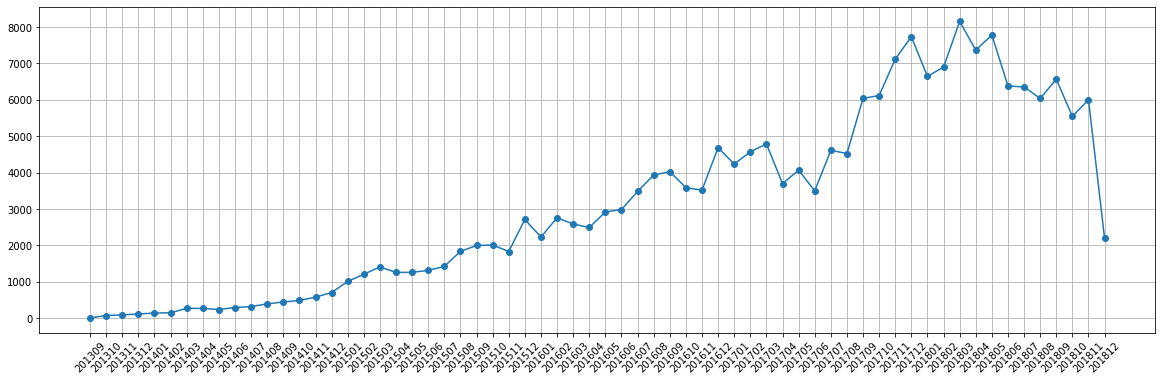

In [12]:
plt.figure(figsize=(20,6))
plt.plot(data_yearmonth['InvoiceYearMonth'].to_numpy(dtype='str'), data_yearmonth['ID_Order'], marker ='o')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [14]:
data_city = data.groupby(['city_name_fa'])['ID_Customer'].nunique().reset_index()
data_city

,city_name_fa,ID_Customer
0,آب بر,14
1,آبادان,320
2,آباده,48
3,آباده طشک,3
4,آبدان,2
...,...,...
901,گیوی,10
902,یاسوج,229
903,یاسوکند,1
904,یامچی,1


In [15]:
data_city_sort = data_city.sort_values('ID_Customer', ascending=False)        
data_city_more_costumer = data_city_sort[:10] 

data_city_more_costumer

,city_name_fa,ID_Customer
215,تهران,81048
815,کرج,4758
654,مشهد,4674
76,اصفهان,4664
97,اهواز,3353
505,شیراز,3076
355,رشت,2414
202,تبریز,2075
593,قم,1905
818,کرمانشاه,1718


In [21]:
from bidi.algorithm import get_display                                      
from arabic_reshaper import reshape 

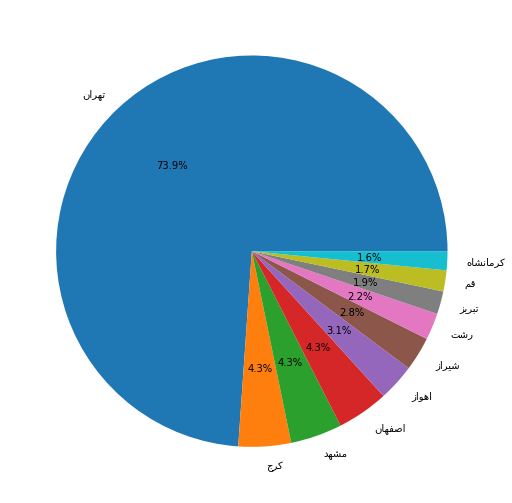

In [28]:
labels = data_city_more_costumer['city_name_fa']
labels = [get_display(reshape(label)) for label in labels]
plt.figure(figsize=(14,9))
plt.pie(data_city_more_costumer['ID_Customer'], labels=labels, autopct='%1.1f%%')
plt.show() 